<a href="https://colab.research.google.com/github/amnasaeed1/Alzheimer-s-Disease-Classification/blob/main/Code%20for%20Alzheimer's%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.set_option('display.max_row',40)
pd.set_option('display.max_column',100)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df1 = pd.read_csv("/oasis_cross-sectional.csv")
df1.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [4]:
print('There is' , df1.shape[0] , 'rows')
print('There is' , df1.shape[1] , 'columns')

There is 436 rows
There is 12 columns


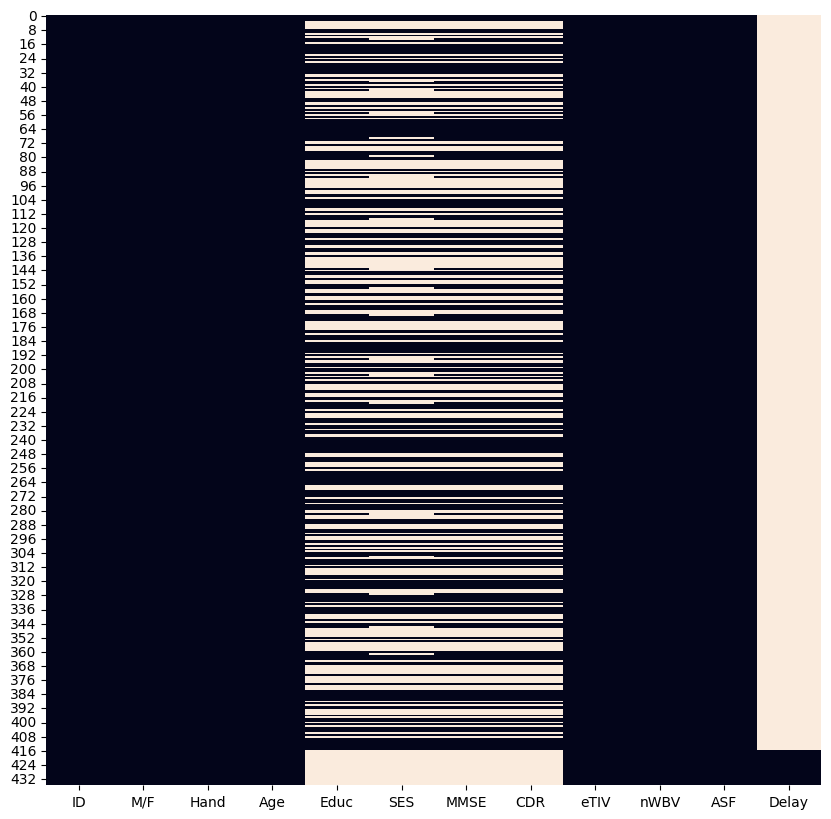

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.isna(),cbar=False)
plt.show()

In [7]:
df2 = pd.read_csv("/oasis_longitudinal.csv")
df2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [8]:
print('There is' , df2.shape[0] , 'rows')
print('There is' , df2.shape[1] , 'columns')

There is 373 rows
There is 15 columns


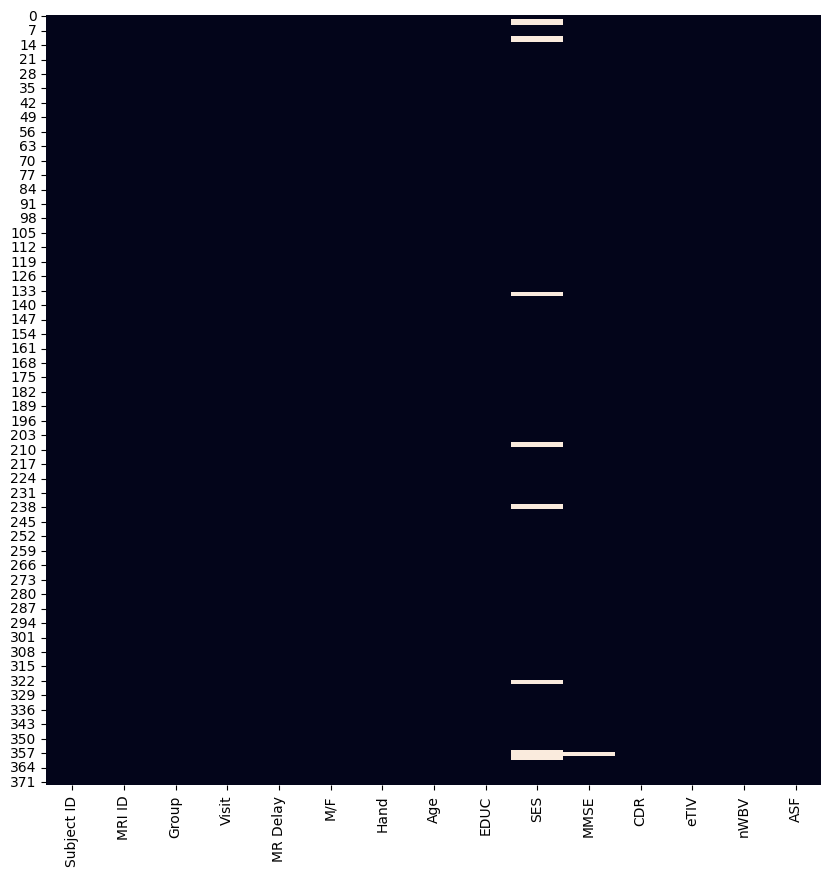

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.isna(),cbar=False)
plt.show()

,MRI ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Subject ID,Group,Visit,MR Delay,EDUC
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,NaN,NaN,NaN,NaN,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,NaN,NaN,NaN,NaN,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,NaN,NaN,NaN,NaN,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,NaN,NaN,NaN,NaN,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,NaN,NaN,NaN,NaN,NaN


There is 809 rows
There is 17 columns


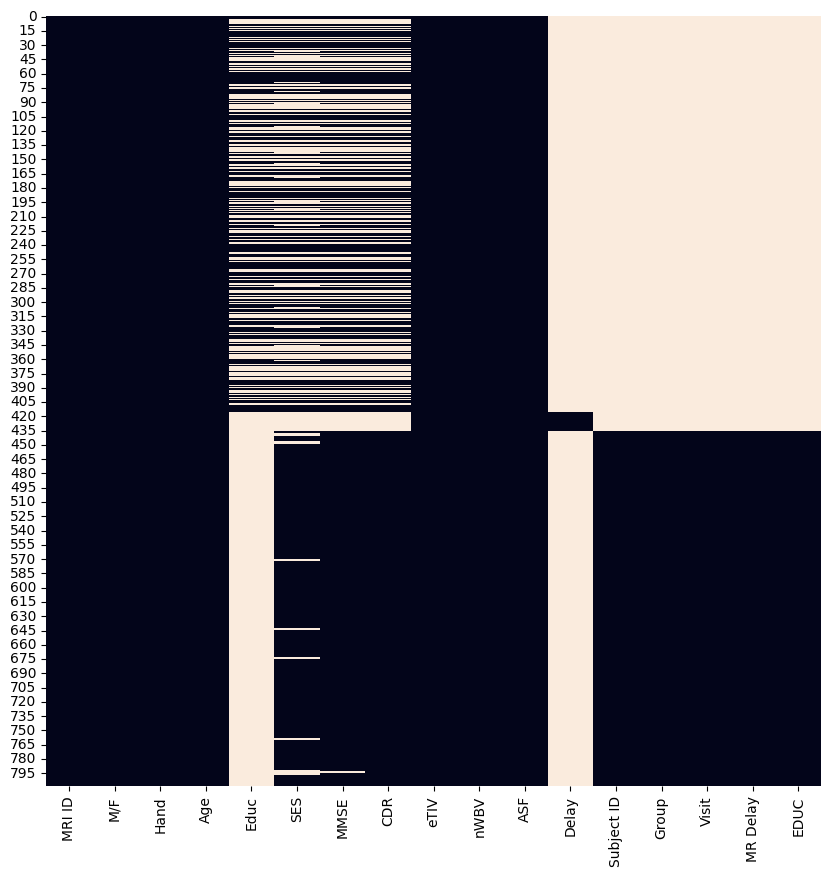

Remove the columns with more than 60% of missing values


,MRI ID,M/F,Hand,Age,SES,MMSE,CDR,eTIV,nWBV,ASF,Group,Visit,MR Delay
436,OAS2_0001_MR1,M,R,87,2.0,27.0,0.0,1987,0.696,0.883,Nondemented,1.0,0.0
437,OAS2_0001_MR2,M,R,88,2.0,30.0,0.0,2004,0.681,0.876,Nondemented,2.0,457.0
438,OAS2_0002_MR1,M,R,75,NaN,23.0,0.5,1678,0.736,1.046,Demented,1.0,0.0
439,OAS2_0002_MR2,M,R,76,NaN,28.0,0.5,1738,0.713,1.010,Demented,2.0,560.0
440,OAS2_0002_MR3,M,R,80,NaN,22.0,0.5,1698,0.701,1.034,Demented,3.0,1895.0


There is 373 rows
There is 13 columns


,Missing values (%)
SES,5.093834
MMSE,0.536193
MRI ID,0.000000
M/F,0.000000
Hand,0.000000
Age,0.000000
CDR,0.000000
eTIV,0.000000
nWBV,0.000000
ASF,0.000000


In [10]:
#Merging df1 & df2
df1.rename(columns={'ID':'MRI ID'},inplace=True)
df = pd.concat([df1,df2],ignore_index=True)
display(df.head())
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(),cbar=False)
plt.show()

print("Remove the columns with more than 60% of missing values")
# Remove the columns with more than 60% of missing values :
df.drop(df.columns[df.isna().sum()/df.shape[0] > 0.6],axis=1,inplace=True)

# Remove rows whre Group is NaN
df.dropna(subset=['Group'],inplace=True)

df.drop(['EDUC', 'Subject ID'],axis=1,inplace=True)
display(df.head())
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')
missing = (df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)
display(pd.DataFrame(missing,columns=['Missing values (%)']))

In [11]:
for col in df.select_dtypes("object").columns[1:]:
    print(f'{col :-<50} {df[col].unique()}')

M/F----------------------------------------------- ['M' 'F']
Hand---------------------------------------------- ['R']
Group--------------------------------------------- ['Nondemented' 'Demented' 'Converted']


In [12]:
# Dropping the column Hand because it has only one value
df.drop(['Hand'],axis=1,inplace=True)

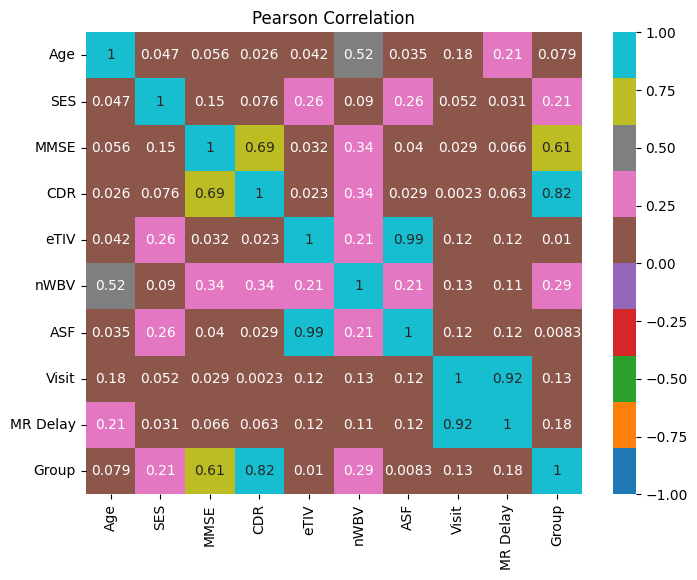

In [13]:
# Select from df only the columns with numerical values
df_num = df.select_dtypes(exclude="object")

# Create a new column called Group, where 1 is for the patients with AD and 0 for the patients without AD
df_num['Group'] = df['Group'].apply(lambda x: 1 if x == 'Demented' else 0)
corr = df_num.corr(method='pearson').abs()
fig = plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='tab10', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

In [14]:
# IMPUTATION

# import knnimputer
from sklearn.impute import KNNImputer
# create an instance of KNNImputer
inputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# Input and print a report of what has been inputed
df = pd.DataFrame(inputer.fit_transform(df_num),columns=df_num.columns)
df.head()

,Age,SES,MMSE,CDR,eTIV,nWBV,ASF,Visit,MR Delay,Group
0,87.0,2.0,27.0,0.0,1987.0,0.696,0.883,1.0,0.0,0.0
1,88.0,2.0,30.0,0.0,2004.0,0.681,0.876,2.0,457.0,0.0
2,75.0,1.8,23.0,0.5,1678.0,0.736,1.046,1.0,0.0,1.0
3,76.0,1.6,28.0,0.5,1738.0,0.713,1.010,2.0,560.0,1.0
4,80.0,2.6,22.0,0.5,1698.0,0.701,1.034,3.0,1895.0,1.0


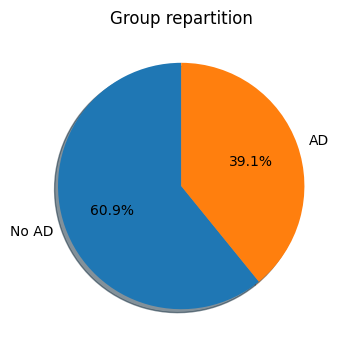

In [15]:
# Visulaize Target & Features

# Show a pie chart of Group class repartition
plt.figure(figsize=(4,4))
plt.pie(df['Group'].value_counts(),labels=['No AD','AD'],autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Group repartition')
plt.show()

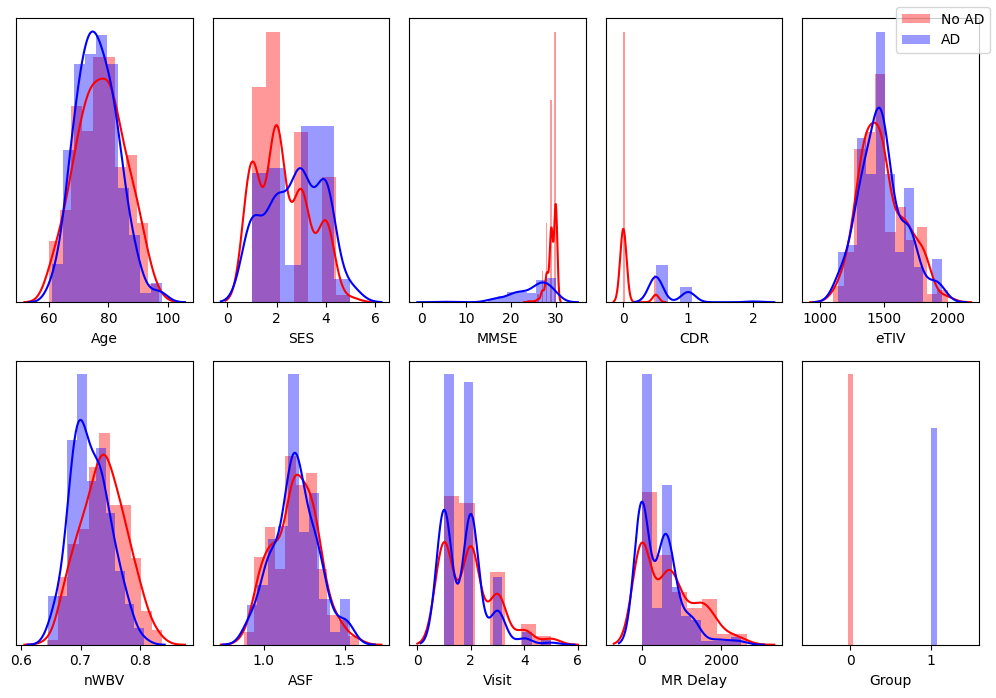

In [16]:
fig, axes = plt.subplots(2,5,figsize=(10,7))

for idx,col in enumerate(df.select_dtypes(include=['float64','int64'])):
    sns.distplot(df[df["Group"]==0][col],label='No AD',color='red',ax=axes[idx//5,idx%5])
    sns.distplot(df[df["Group"]==1][col],label='AD',color='blue',ax=axes[idx//5,idx%5])
    #hide y labels and values
    axes[idx//5,idx%5].set_yticks([])
    axes[idx//5,idx%5].set_ylabel('')
fig.tight_layout()
fig.legend(labels=['No AD',"_",'AD',"_"])
fig.show()

<Figure size 400x400 with 0 Axes>

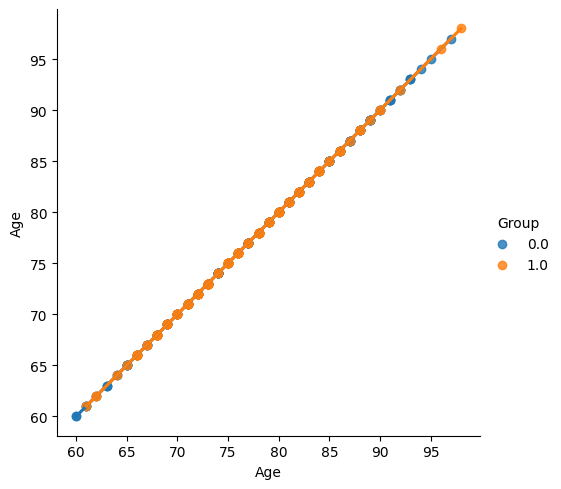

<Figure size 400x400 with 0 Axes>

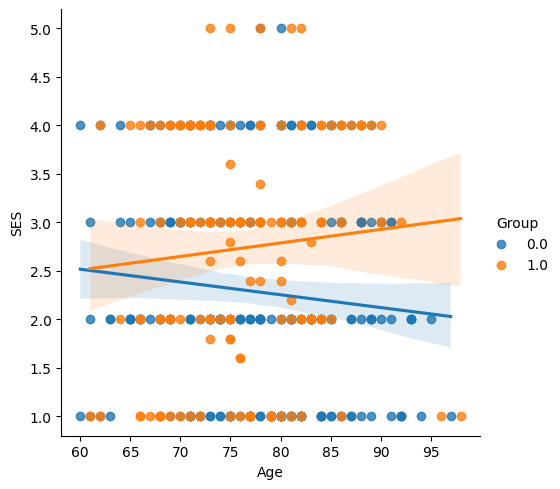

<Figure size 400x400 with 0 Axes>

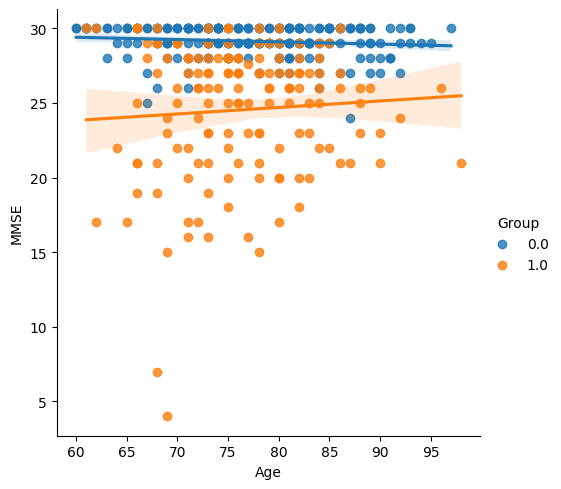

<Figure size 400x400 with 0 Axes>

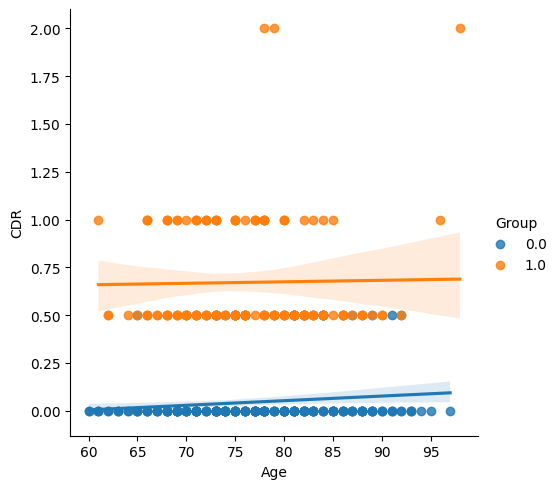

<Figure size 400x400 with 0 Axes>

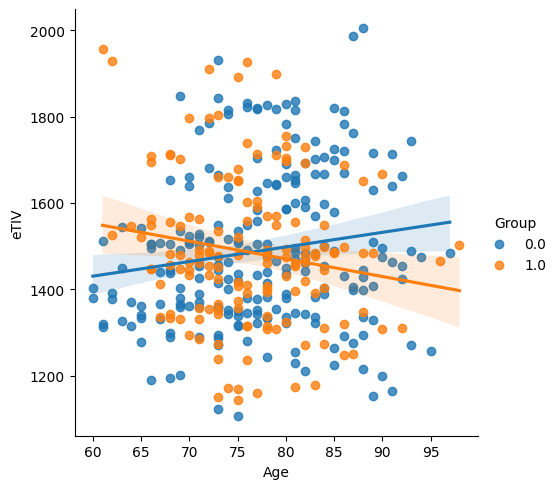

<Figure size 400x400 with 0 Axes>

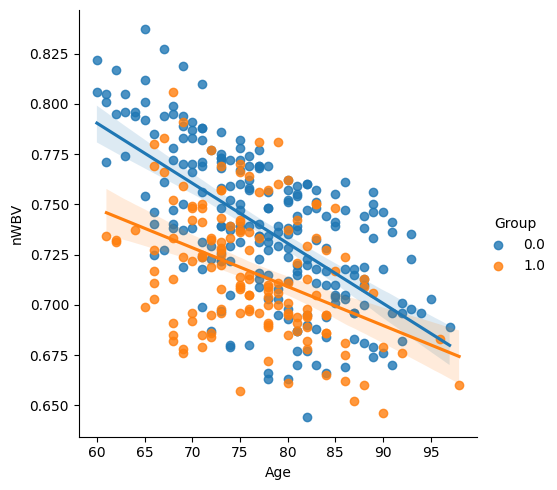

<Figure size 400x400 with 0 Axes>

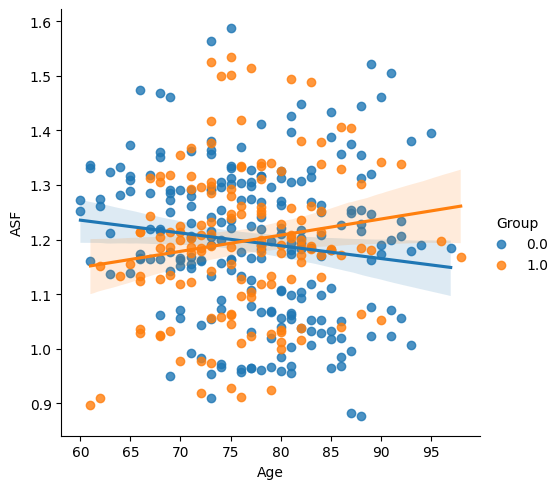

<Figure size 400x400 with 0 Axes>

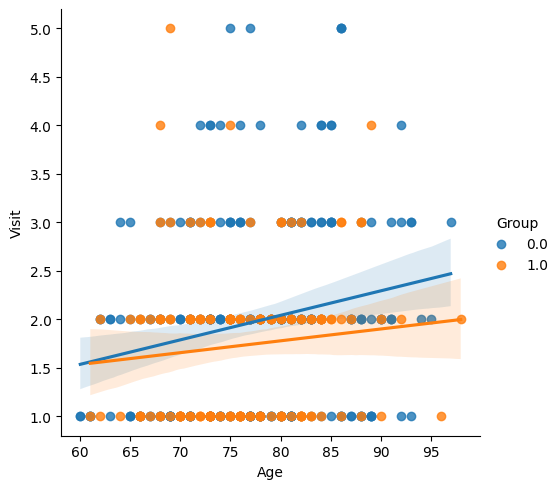

<Figure size 400x400 with 0 Axes>

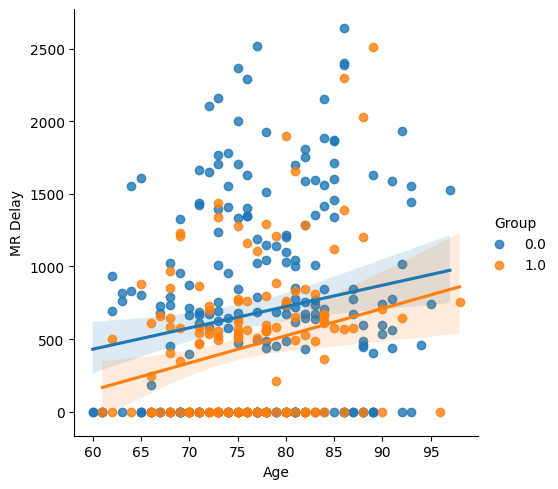

<Figure size 400x400 with 0 Axes>

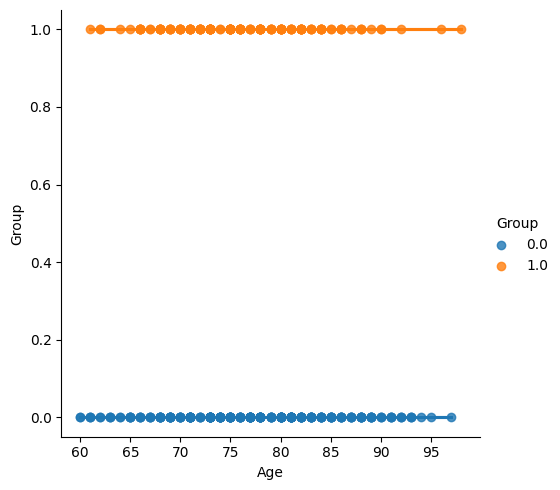

In [17]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure(figsize=(4,4))
    sns.lmplot(x='Age', y=col, hue='Group', data=df)

In [18]:
# Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Group',axis=1),df['Group'],test_size=0.2,random_state=42)
X, y = df.drop('Group',axis=1),df['Group']
print(y_train.value_counts())
print(y_test.value_counts())

Group
0.0    184
1.0    114
Name: count, dtype: int64
Group
0.0    43
1.0    32
Name: count, dtype: int64


In [19]:
# Modeling

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [20]:
# Pipeline

preprocessor = make_pipeline(StandardScaler())

PCAPipeline = make_pipeline(preprocessor, PCA(n_components=2,random_state=0))

RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=0,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression(solver='sag'))

In [21]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X))
PCA_df = pd.concat([PCA_df, y], axis=1)
PCA_df.head()

,0,1,Group
0,2.404101,0.127069,0.0
1,3.220676,-0.696065,0.0
2,0.554687,1.283451,1.0
3,1.696845,0.113319,1.0
4,2.937297,0.489625,1.0


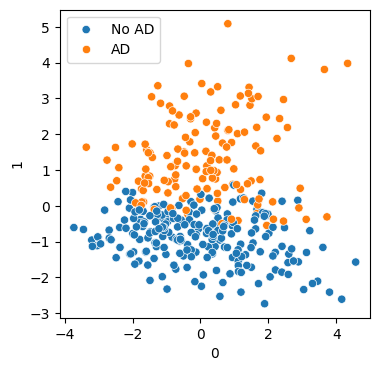

In [22]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=PCA_df[0],y=PCA_df[1],hue=PCA_df['Group'],palette=sns.color_palette("tab10", 2))
plt.legend(labels=['No AD','_', 'AD','_'])
plt.show()

In [23]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline}

In [26]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.metrics import RocCurveDisplay

def evaluation(model):
    model.fit(X_train, y_train)
    # calculating the probabilities
    y_pred_proba = model.predict_proba(X_test)

    # finding the predicted valued
    y_pred = np.argmax(y_pred_proba,axis=1)
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('-')
    print(confusion_matrix(y_test,y_pred))
    print('-')
    print(classification_report(y_test,y_pred))
    print('-')
    RocCurveDisplay.from_predictions(
        y_test,
        y_pred,
        name=f"ROC",
        color="darkorange",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curve")
    plt.legend()
    plt.show()

    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1,1,10))

    plt.figure(figsize=(8,6))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()



---------------------------------
RandomForest
Accuracy =  0.96
-
[[41  2]
 [ 1 31]]
-
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.94      0.97      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

-


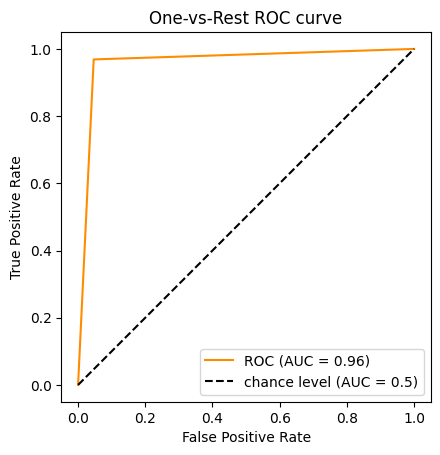

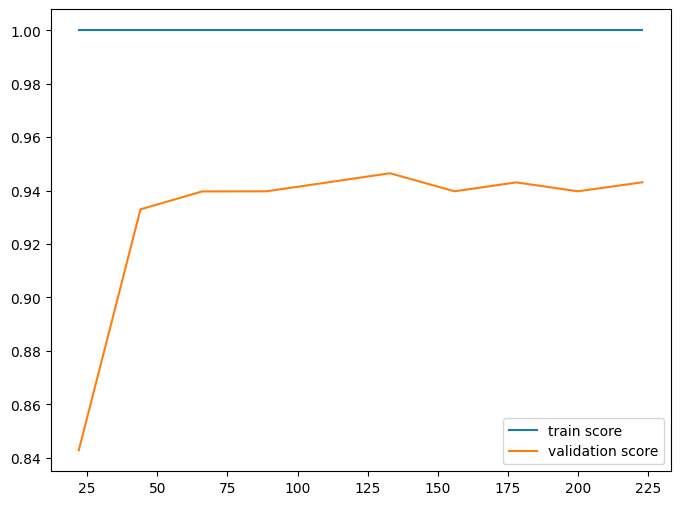

---------------------------------
AdaBoost
Accuracy =  0.9466666666666667
-
[[41  2]
 [ 2 30]]
-
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        43
         1.0       0.94      0.94      0.94        32

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

-


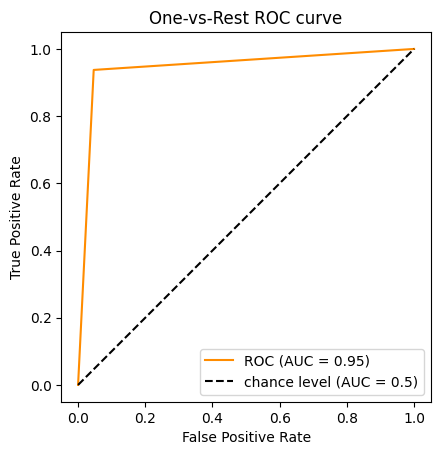

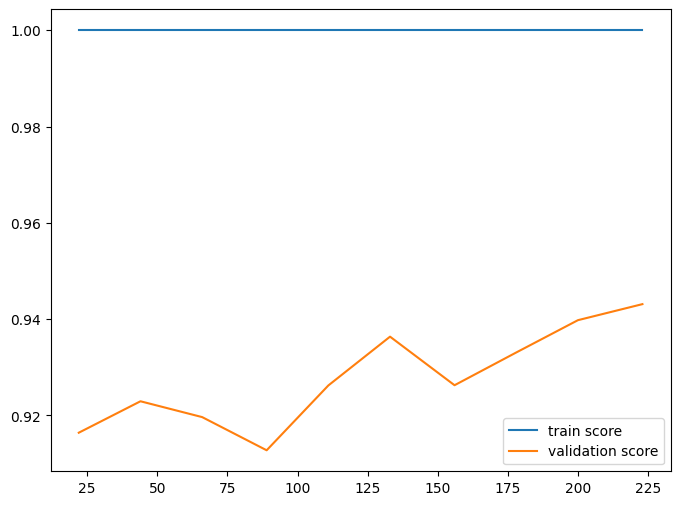

---------------------------------
SVM
Accuracy =  0.96
-
[[41  2]
 [ 1 31]]
-
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.94      0.97      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

-


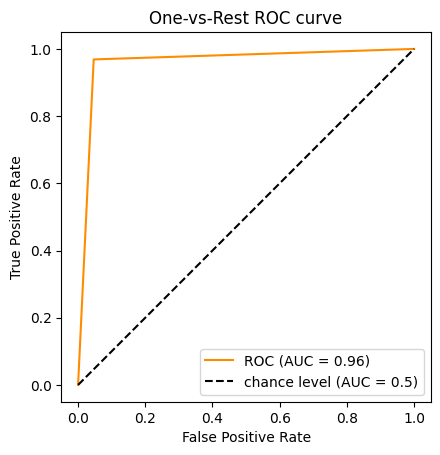

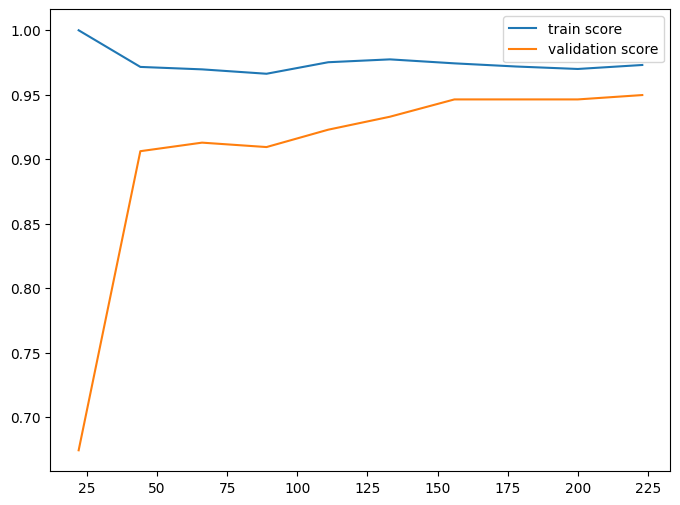

---------------------------------
KNN
Accuracy =  0.9066666666666666
-
[[43  0]
 [ 7 25]]
-
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        43
         1.0       1.00      0.78      0.88        32

    accuracy                           0.91        75
   macro avg       0.93      0.89      0.90        75
weighted avg       0.92      0.91      0.90        75

-


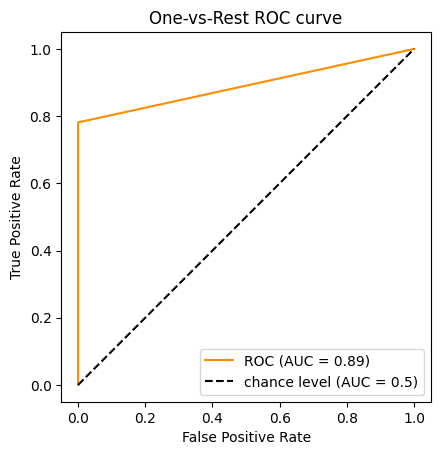

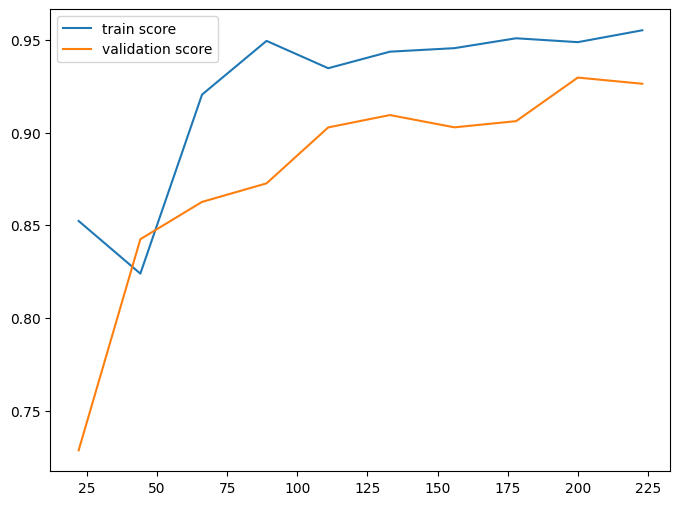

---------------------------------
LR
Accuracy =  0.96
-
[[41  2]
 [ 1 31]]
-
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.94      0.97      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

-


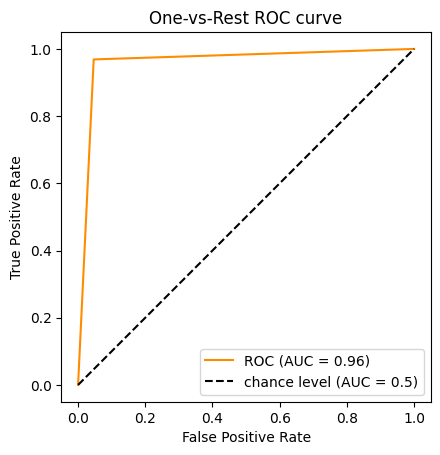

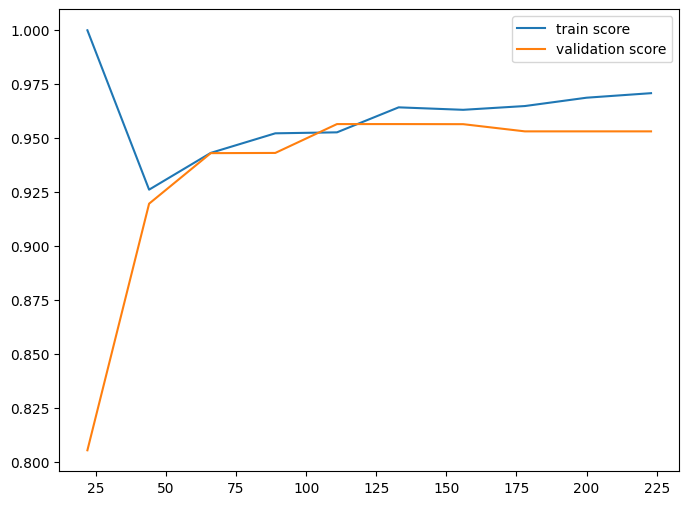

In [27]:
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation(model)